In [54]:
import sys
import platform
import importlib

if platform.system() == 'Darwin':  # macOS
    base_FP = '/Users/hyunglokkim/Insync/hkim@geol.sc.edu/Google_Drive'
    cpuserver_data_FP = '/Users/hyunglokkim/cpuserver_data'
else:
    base_FP = '/data'
    cpuserver_data_FP = '/data'
sys.path.append(base_FP + '/python_modules')

#hydroAI libs
import HydroAI.HLS as HLS
importlib.reload(HLS);

In [55]:
target_date = '2022.11.22'
base_folder = '/Users/hyunglokkim/cpuserver_data/HLS_temp/'+target_date

In [56]:
# Example usage to get any band values and lon/lat data:
s2_reader = HLS.SentinelBandReader(base_folder)

# Access different bands
red_data = s2_reader.red  # Red band
nir_data = s2_reader.nir  # Near-infrared band
swir1_data = s2_reader.swir1  # Short-wave infrared 1
qa_data = s2_reader.qa  # QA band
lon, lat = s2_reader.get_lat_lon_arrays('red')

print("Red Band Data:")
print(red_data)
print("Longitude Data:")
print(lon)

Red Band Data:
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Longitude Data:
[[38.02029424 38.02057166 38.02084908 ... 40.07458095 40.07485837
  40.07513579]
 [38.02029424 38.02057166 38.02084908 ... 40.07458095 40.07485837
  40.07513579]
 [38.02029424 38.02057166 38.02084908 ... 40.07458095 40.07485837
  40.07513579]
 ...
 [38.02029424 38.02057166 38.02084908 ... 40.07458095 40.07485837
  40.07513579]
 [38.02029424 38.02057166 38.02084908 ... 40.07458095 40.07485837
  40.07513579]
 [38.02029424 38.02057166 38.02084908 ... 40.07458095 40.07485837
  40.07513579]]


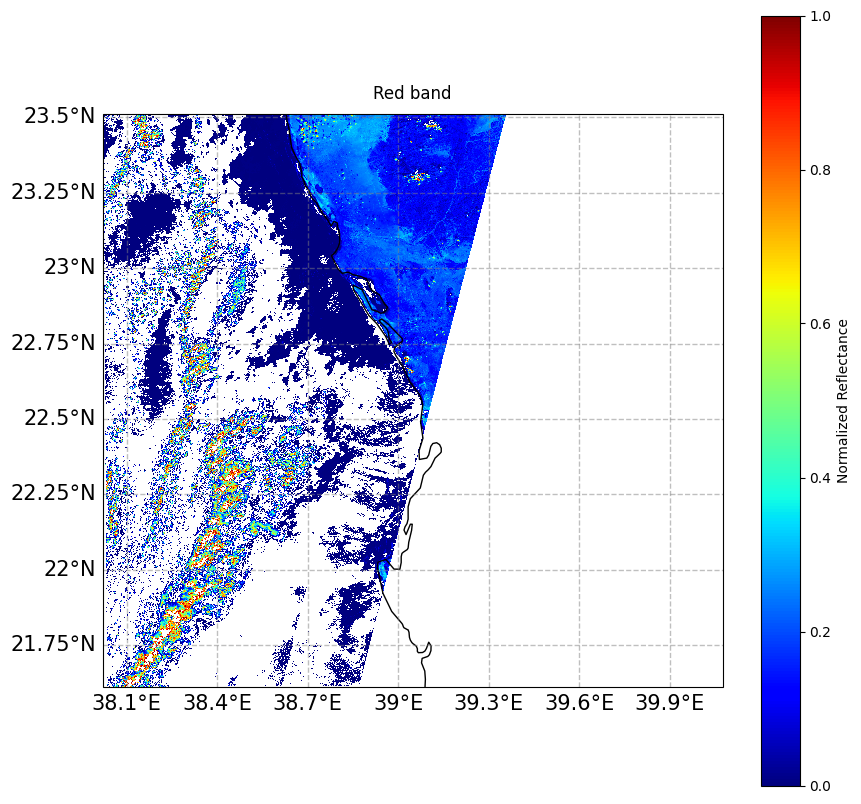

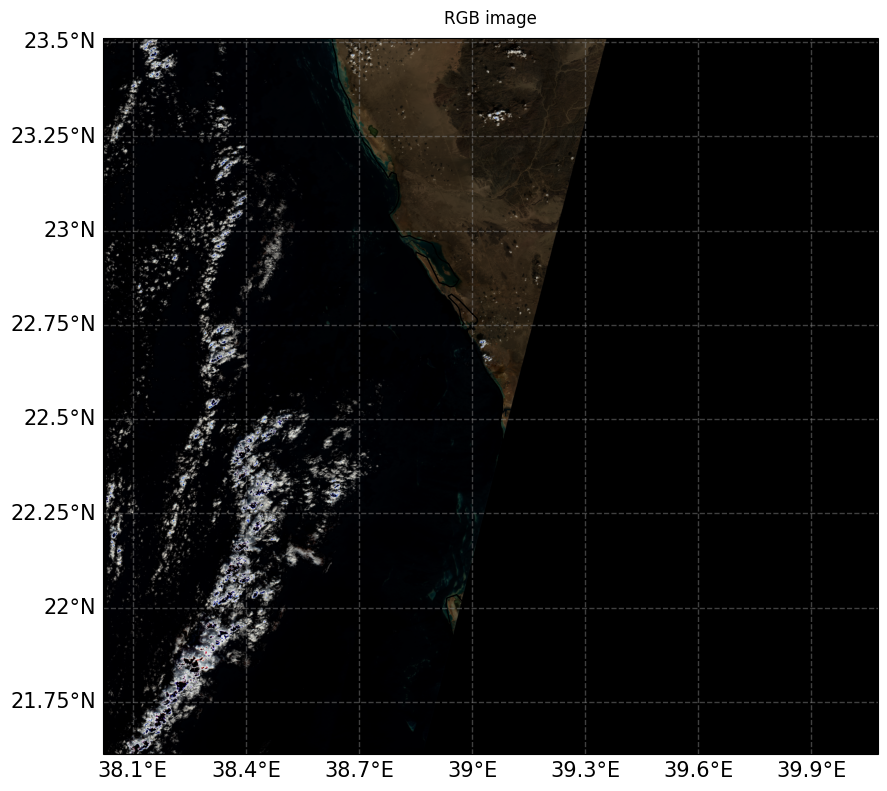

In [7]:
# Example usage to plot an individual band or RGB image
s2_reader = HLS.SentinelBandReader(base_folder)
s2_plotter = HLS.SentinelBandPlotter(s2_reader)

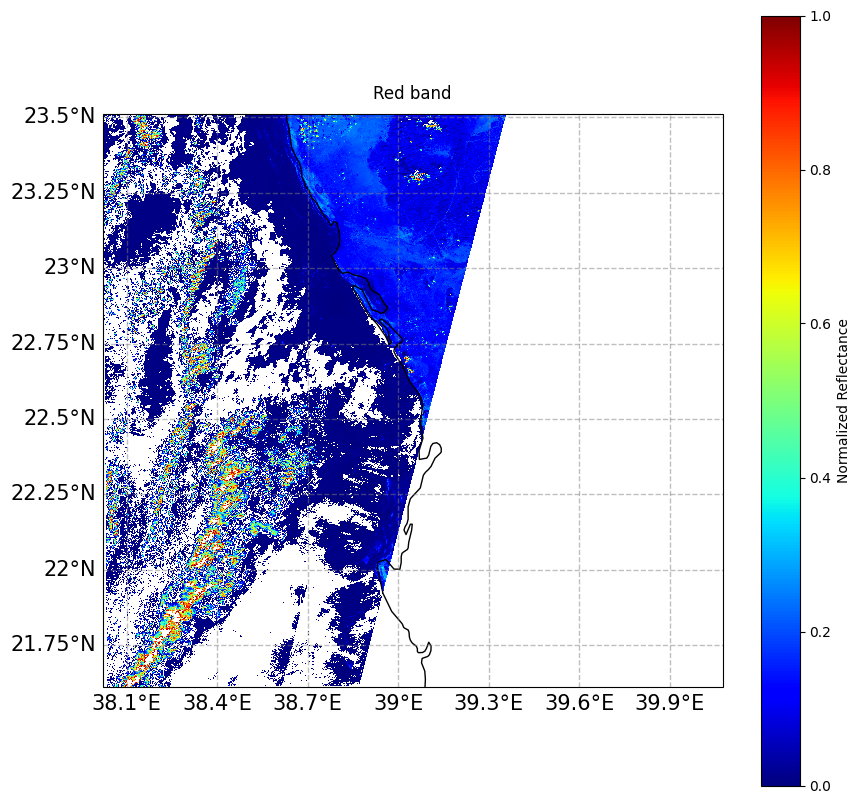

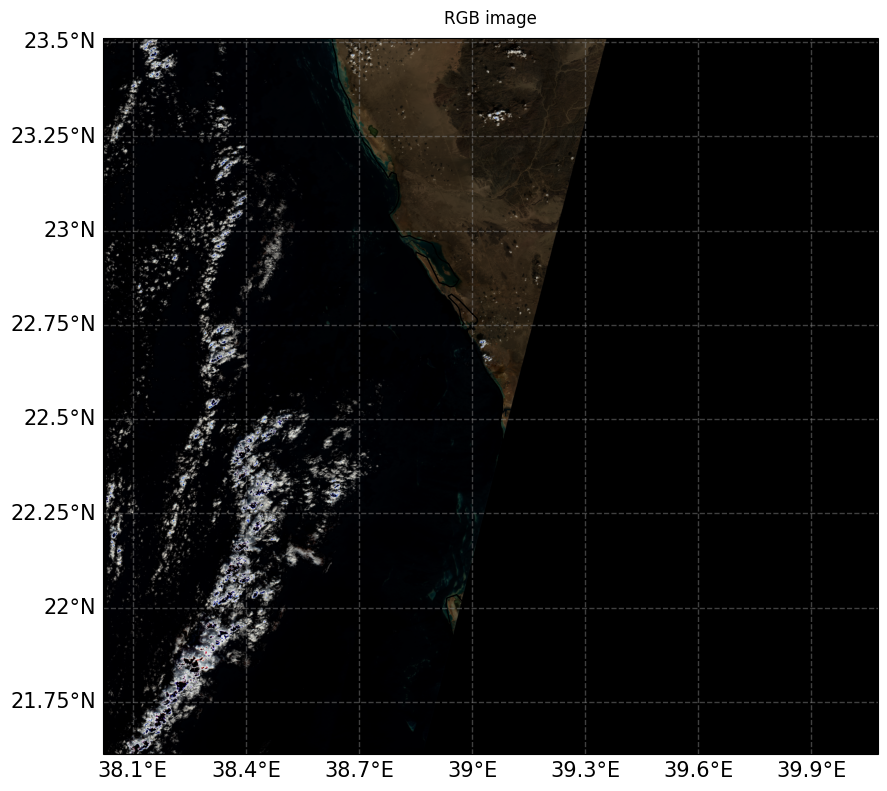

In [8]:
s2_plotter.plot_band('green', 'jet', 'Red band')
s2_plotter.plot_rgb('RGB image')

In [52]:
# Example usage to calculate an water body index
target_date = '2022.11.27'
base_folder = '/Users/hyunglokkim/cpuserver_data/HLS_temp/'+target_date
s2_reader = HLS.SentinelBandReader(base_folder)
water_indices_calculator = HLS.WaterIndicesCalculator(s2_reader)
mndwi, transform = water_indices_calculator.calculate_mndwi()

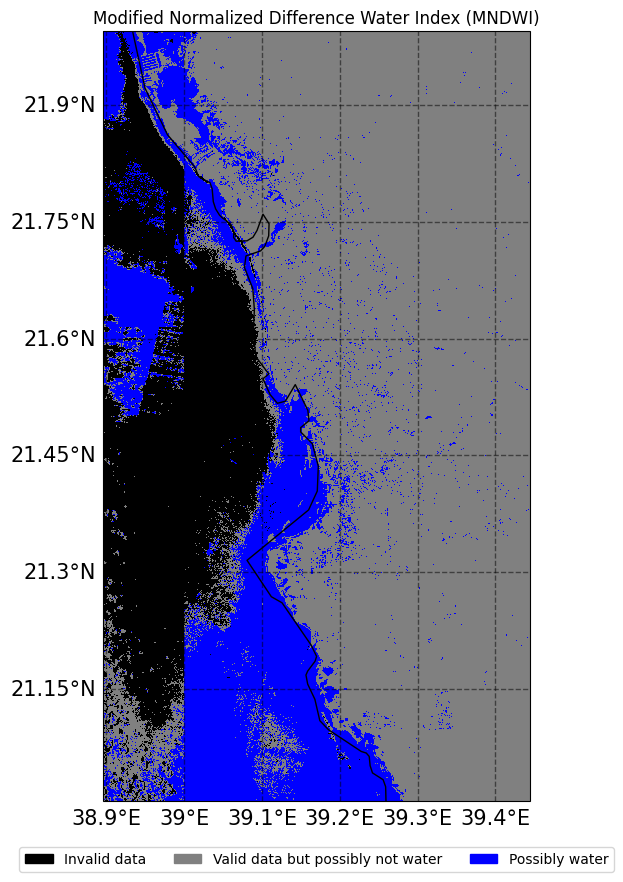

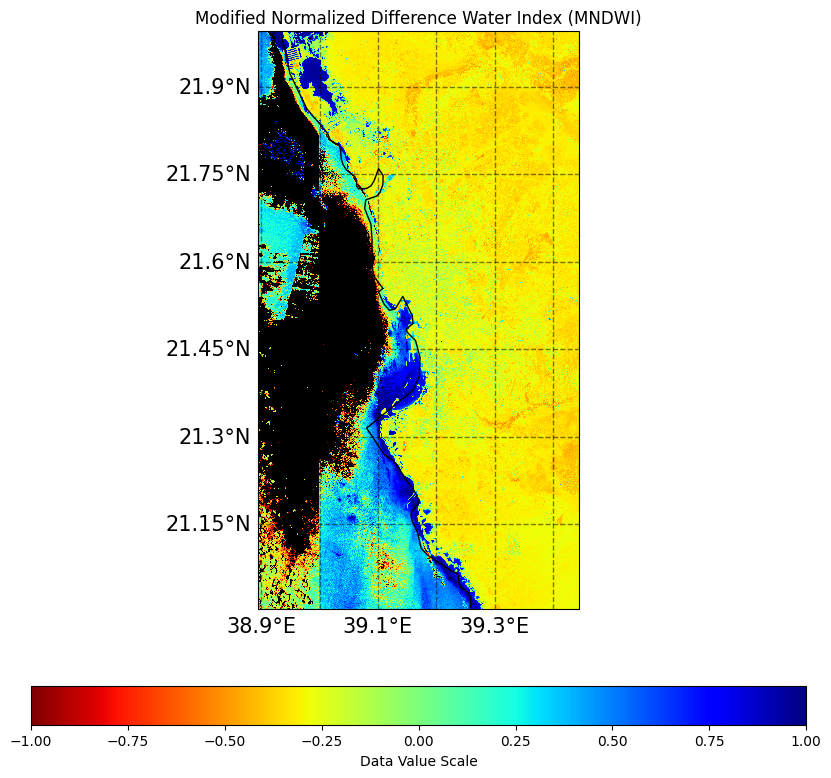

In [53]:
# Example uses to plot the water body index with threshold or raw values 
bounds = [38.895, 39.445, 21.005, 21.995]
# with a threshold
s2_plotter.plot_index(mndwi, transform, threshold=-0.1, title='Modified Normalized Difference Water Index (MNDWI)', bounds = bounds)
# without a threshold
s2_plotter.plot_index(mndwi, transform, title='Modified Normalized Difference Water Index (MNDWI)', cmap='jet_r', bounds = bounds)